In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

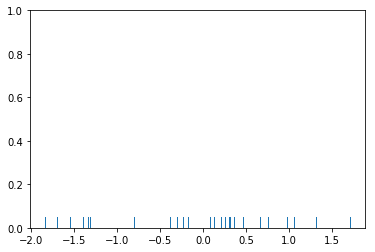

In [5]:
sns.rugplot(dataset)

#let y limits on it
plt.ylim(0,1)

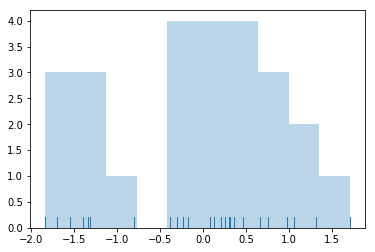

In [6]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

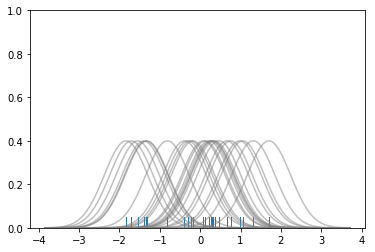

In [11]:
sns.rugplot(dataset)
# setting the min/max for x
x_min = dataset.min() - 2
x_max = dataset.max() + 2

#100 equally points from x min to x max
x_axis = np.linspace(x_min, x_max, 100)

# This is the kernel density estimate plot equation - check wiki
bandwidth = ( (4*dataset.std()**5)/ (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    #Create a kernal for each point and append it to the kernal_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel/ kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color ='grey', alpha = 0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

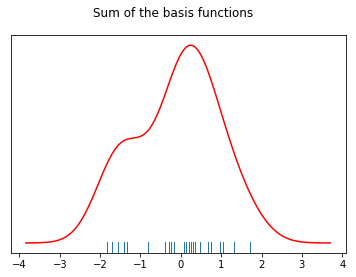

In [12]:
# We gotta sum all of these
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color = 'red')

sns.rugplot(dataset)

#Get rid of tick marks
plt.yticks([])

plt.suptitle("Sum of the basis functions")

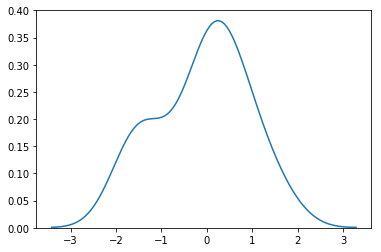

In [14]:
# We can do this in one step using seaborn!!

sns.kdeplot(dataset)

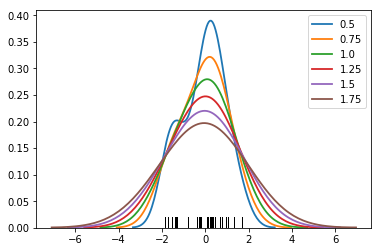

In [16]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw=bw,lw=1.8,label=bw)
    

In [17]:
url = 'http://en.wikipedia.org/wiki/kernel-(statistics)'

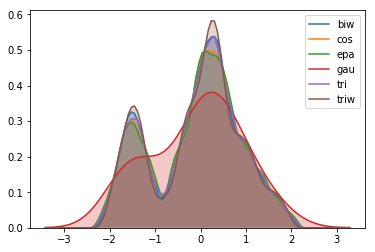

In [19]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)
#shading by using keyword shade

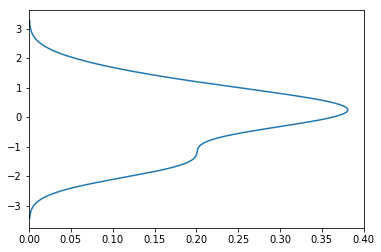

In [21]:
# plot on vertical access
sns.kdeplot(dataset,vertical=True)

In [22]:
url = 'http://en.wikipedia.org/wiki/cumulative_distribution_function'

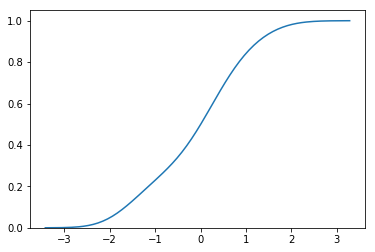

In [24]:
# plot using CDF by using cumulative
sns.kdeplot(dataset, cumulative = True)

/Users/randyhoang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


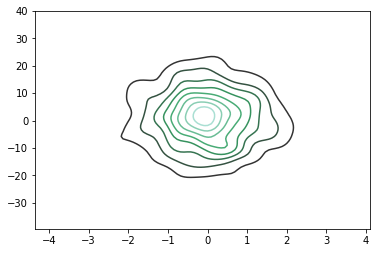

In [25]:
mean = [0,0]

cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2, columns=['X','Y'])

sns.kdeplot(dframe)

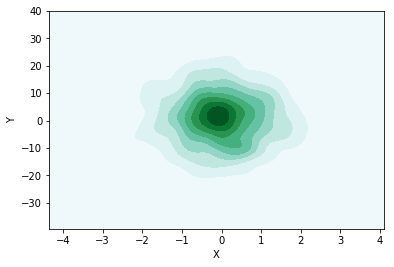

In [28]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

/Users/randyhoang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


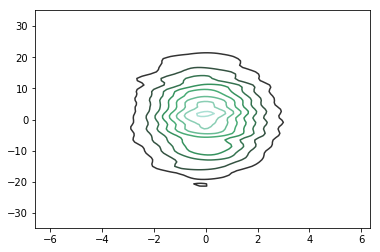

In [29]:
#specify bandwidths
sns.kdeplot(dframe,bw=1)

/Users/randyhoang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


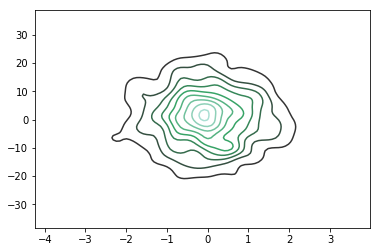

In [30]:
sns.kdeplot(dframe, bw='silverman')

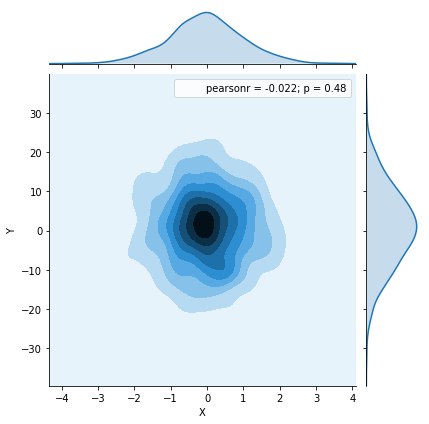

In [31]:
sns.jointplot('X','Y',dframe, kind='kde')